In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("dataset/refined.tsv", sep="\t")

In [5]:
df

,atua_como,bool_cert,provedor,maior_desafio,tam_equipe,avaliacao,porte,tam_investimento,posicao,segmentacao,...,bool_alt_custo,bool_alt_tec,bool_falha_gov,bool_falha_dev,bool_falha_aus_info,bool_falha_pln_custo,bool_falha_gst_lid,bool_falha_usu,qt_alteracoes,qt_falhas
0,Terceiro,1,AWS,Variedade,"[0,5]",5,"]500,+∞]","[0,10]",Dev,B2B,...,0,0,0,0,0,0,0,0,2,0
1,Terceiro,1,AWS,Velocidade,"]10,20]",4,"]100,500]",NaN,Gestão,B2B,...,0,0,0,1,0,1,0,0,0,2
2,Interno,1,Azure,Variedade,"]10,20]",3,"]20,50]","]20,30]",Dev,B2ALL,...,1,0,1,0,0,1,1,0,2,3
3,Terceiro,0,AWS,Volume,"]5,10]",5,"[0,20]","]10,20]",Dev,B2B,...,0,1,0,0,0,0,0,0,2,0
4,Interno,1,Azure,Velocidade,"[0,5]",4,"]100,500]","]50,100]",Gestão,B2B,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Interno,1,GCP,Variedade,"]35,+∞]",4,"]500,+∞]","]50,100]",Gestão,B2ALL,...,1,1,0,0,0,1,0,1,3,2
98,Terceiro,0,AWS,Volume,"]10,20]",4,"]500,+∞]","]100,+∞]",Dev,B2B,...,0,0,0,0,0,0,0,0,0,0
99,Interno,1,AWS,Velocidade,"]5,10]",5,"]500,+∞]","]100,+∞]",Gestão,B2ALL,...,0,1,0,0,0,0,0,0,1,0
100,Interno,1,AWS,Velocidade,"]5,10]",3,"]100,500]","]100,+∞]",Dev,B2B,...,0,1,0,1,0,0,0,0,1,1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

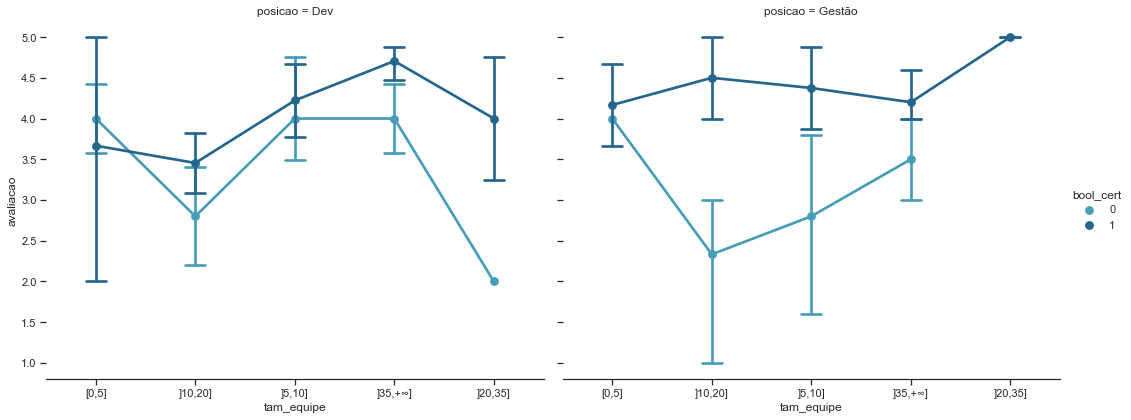

In [10]:
g = sns.catplot(x="tam_equipe", y="avaliacao", hue="bool_cert", col="posicao",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1.25,
                kind="point", data=df)
g.despine(left=True)

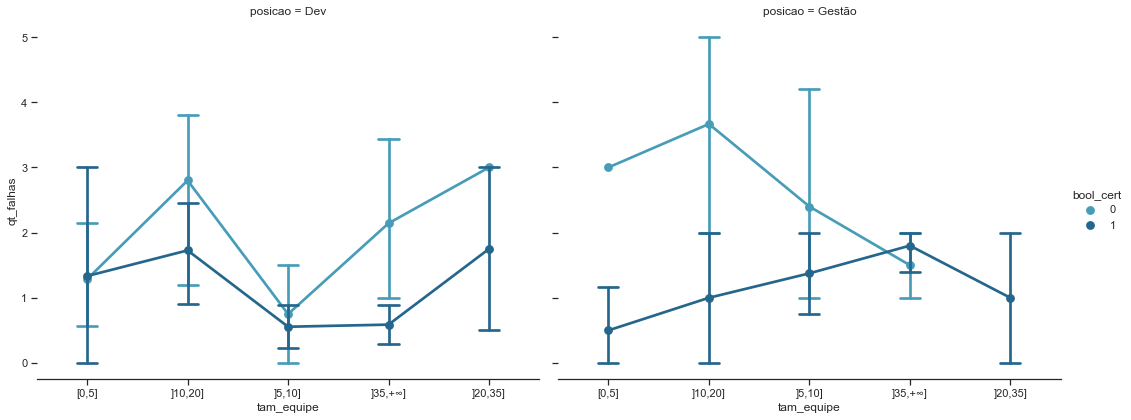

In [12]:
g = sns.catplot(x="tam_equipe", y="qt_falhas", hue="bool_cert", col="posicao",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1.25,
                kind="point", data=df)
g.despine(left=True)

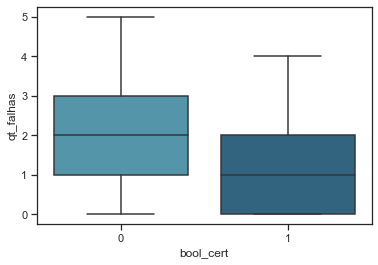

In [26]:
g = sns.boxplot(x="bool_cert", y="qt_falhas", palette="YlGnBu_d", data=df)

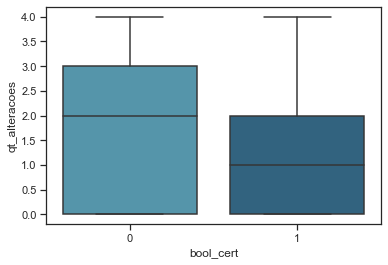

In [25]:
g = sns.boxplot(x="bool_cert", y="qt_alteracoes", palette="YlGnBu_d", data=df)

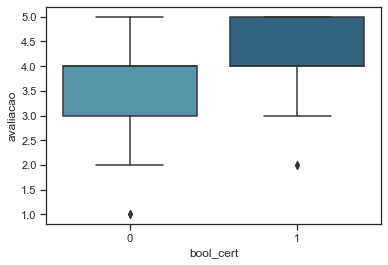

In [24]:
g = sns.boxplot(x="bool_cert", y="avaliacao", palette="YlGnBu_d", data=df)

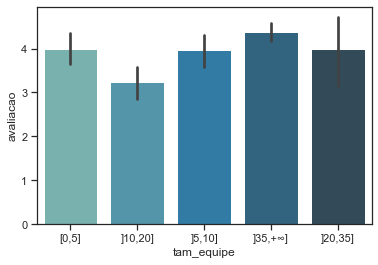

In [27]:
g = sns.barplot(x="tam_equipe", y="avaliacao", palette="YlGnBu_d", data=df)

In [66]:
from scipy import stats

In [67]:
certificado = list(df.query("bool_cert == 1")["avaliacao"])
nao_certificado = list(df.query("bool_cert == 0")["avaliacao"])

In [68]:
t_value,p_value = stats.ttest_ind(certificado,nao_certificado)

In [69]:
t_value

4.426563413593539

In [70]:
round(p_value,7)

2.45e-05

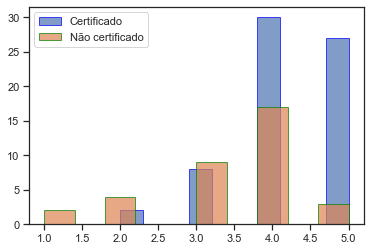

In [79]:
# plotting first histogram
plt.hist(certificado, label='Certificado', alpha=.7, edgecolor='blue')
  
# plotting second histogram
plt.hist(nao_certificado, label='Não certificado', alpha=0.7, edgecolor='green')
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

In [80]:
certificado = list(df.query("bool_cert == 1")["qt_falhas"])
nao_certificado = list(df.query("bool_cert == 0")["qt_falhas"])

In [81]:
t_value,p_value = stats.ttest_ind(certificado,nao_certificado)

In [82]:
t_value

-3.8645546629183123

In [83]:
p_value

0.0001979069782280366

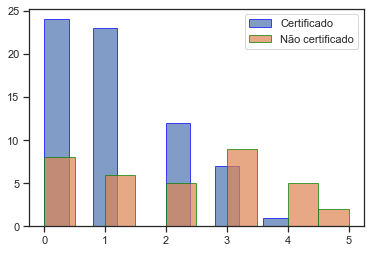

In [84]:
# plotting first histogram
plt.hist(certificado, label='Certificado', alpha=.7, edgecolor='blue')
  
# plotting second histogram
plt.hist(nao_certificado, label='Não certificado', alpha=0.7, edgecolor='green')
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

In [57]:
certificado = list(df.query("bool_cert == 1")["qt_alteracoes"])
nao_certificado = list(df.query("bool_cert == 0")["qt_alteracoes"])

In [58]:
t_value,p_value = stats.ttest_ind(certificado,nao_certificado)

In [59]:
t_value

-1.7567946930826068

In [60]:
p_value

0.08201374171596225

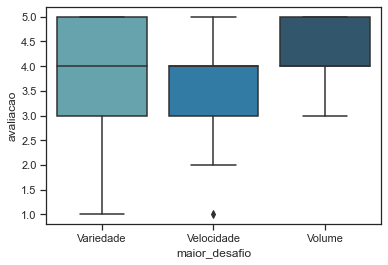

In [65]:
g = sns.boxplot(x="maior_desafio", y="avaliacao", palette="YlGnBu_d", data=df)